## An overview on the COVID-19 KCDC dataset and some insights

COVID-19 has infected more than 10,000 people in South Korea. KCDC (Korea Centers for Disease Control & Prevention) announces the information of COVID-19 quickly and transparently. This structured dataset is collected in line with the report materials of KCDC and local governments. Intuitively, we are collecting insigts into the dataset by answering some critical questions.

Data should be checked for the following items: 
- Each column is a variable, and each row is an individual 
- Number of columns and rows in each of datasets 
- Missing data, and whether those missing data should be imputed or removed 
- Data types check (if they are loaded as the datatype as we expected) 
- Exploratory plots like bar charts and histograms to better understand the data


### Acknowledgements

Thanks sincerely to all the members of KCDC and local governments. Source of data: KCDC (Korea Centers for Disease Control & Prevention) https://www.kaggle.com/kimjihoo/coronavirusdataset

## Library import 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

## Data import

In [20]:
df = pd.read_csv('./PatientInfo.csv')
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [265]:
num_rows = df.shape[0]
print(num_rows)
num_cols = df.shape[1]
print(num_cols)

3253
18


## Data explorations

In [266]:
#Provide a set of columns with 0 missing values.
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'confirmed_date', 'patient_id', 'province', 'state'}

In [267]:
most_missing_cols = set(df.columns[df.isnull().mean() == 0.75])#Provide a set of columns with more than 75% of the values missing
most_missing_cols

set()

In [268]:
df.dropna()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state


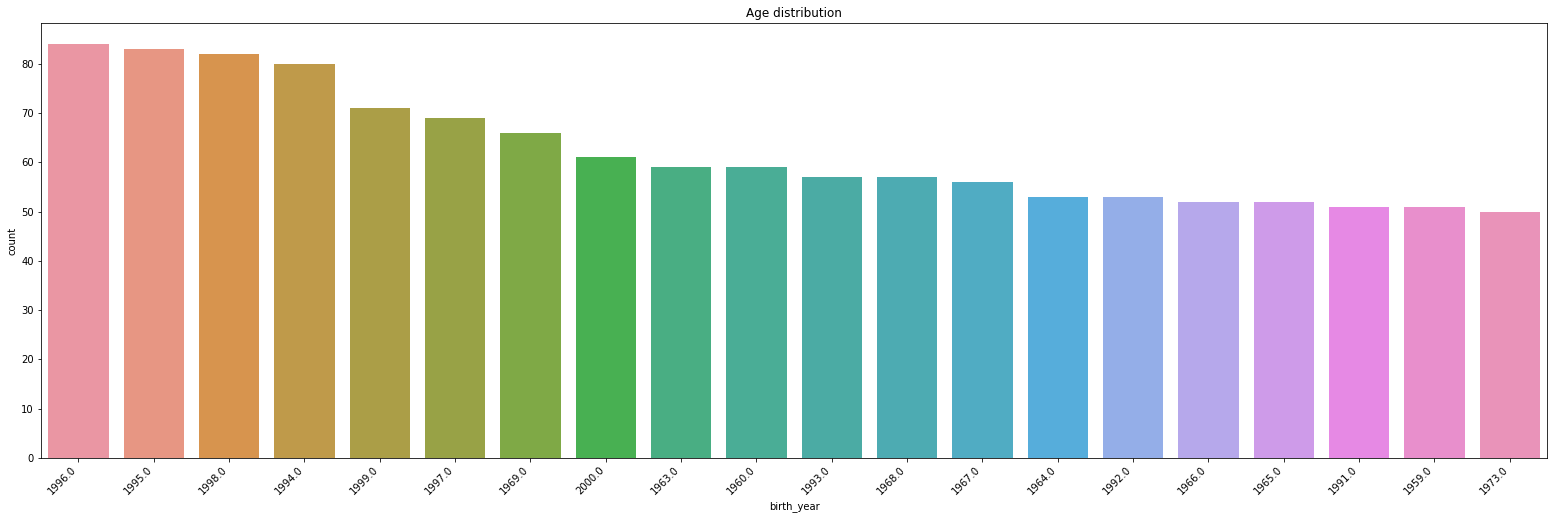

In [271]:
plt.figure(figsize=(27, 8))
ax = sns.countplot(df['birth_year'], order = df['birth_year'].value_counts().index[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Age distribution")
plt.show()

female    1798
male      1402
Name: sex, dtype: int64


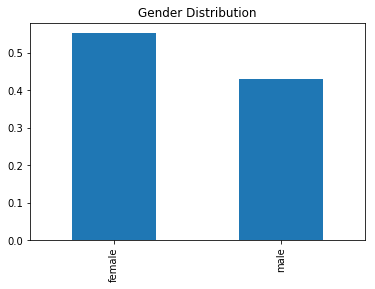

In [272]:
status_vals = df.sex.value_counts()#Provide a pandas series of the counts for gender
print (status_vals)
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("Gender Distribution");


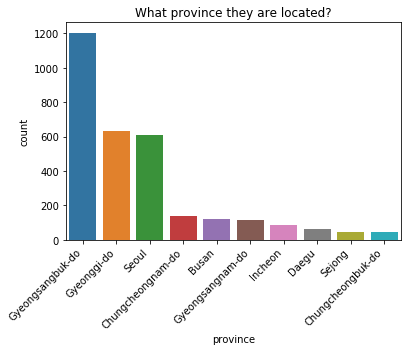

In [230]:
status_vals = df.province.value_counts()#Distribution over different provinces
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What province they are located?");

ax = sns.countplot(df['province'], order = df['province'].value_counts().index[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

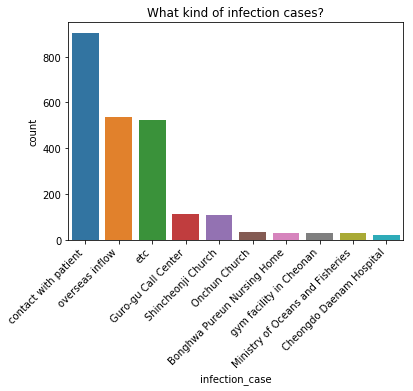

In [231]:
status_vals = df.infection_case.value_counts()#ditribution of infection cases
(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of infection cases?");


ax = sns.countplot(df['infection_case'], order = df['infection_case'].value_counts().index[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [232]:
pd.DataFrame(df.query("infection_case == 'contact with patient' and (sex == 'male' or sex == 'female')").groupby(['sex']).mean()['infection_order'])

,infection_order
sex,
female,3.111111
male,3.200000


In [233]:
df.describe()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,3.253000e+03,2082.000000,2833.000000,31.000000,7.630000e+02,597.000000
mean,3.528899e+09,6460.659462,1974.781151,2.387097,2.583115e+09,18.738693
std,2.209581e+09,3340.810878,20.229949,1.453213,1.673797e+09,76.156335
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.300000e+09,3851.750000,1961.000000,1.000000,1.200000e+09,2.000000
50%,2.000001e+09,7610.000000,1975.000000,2.000000,2.000000e+09,4.000000
75%,6.001001e+09,9324.500000,1993.000000,3.000000,4.100000e+09,14.000000
max,7.000000e+09,10537.000000,2020.000000,6.000000,7.000000e+09,1160.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11eef4a90>,
      dtype=object)

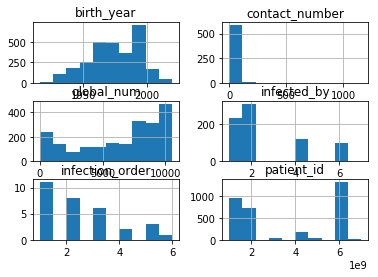

In [21]:
df.hist()

## Imputing missing data

I first checked for the missing value in the basic table called PatientInfo which is the general epidemiological 
data of COVID-19 patients in South Korea. There was no all missing columns, but there exist columns with more than 
75 percent but not fully null. 
We are going to impute numerical value simply with the mean value. However, those columns are not important for the 
later analysis here and we do this as a good practice. For the categorical missing values, I first cerated 
dummy variables for each of the categories, then replaced the missing values by the categories with the highest 
frequency among the others.

In [22]:
cat_df = df.select_dtypes(include=['object'])
cat_df

def create_dummy_df(df, cat_cols, dummy_na):
    """ 
        Creates dummy variables for all categroical data columns
        new names are like: <OldColumnName>_<Value>
        Valid values for dummy variables are 0 or 1
    """
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

cat_cols_lst = cat_df.columns
df = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function


In [56]:
num_df = df.select_dtypes(include=['int','float'])
num_cols_lst = num_df.columns

for col in  num_cols_lst:
    print (col)
    lambda col: col.fillna(col.mean())
    #df[col] = df[col].fillna(col.mean()) #Fill all missing values with the mean of the column.

# test look
df.head()



patient_id
global_num
birth_year
infection_order
infected_by
contact_number


,patient_id,global_num,birth_year,infection_order,infected_by,contact_number,sex_male,age_100s,age_10s,age_20s,...,deceased_date_2020-03-29,deceased_date_2020-03-31,deceased_date_2020-04-02,deceased_date_2020-04-03,deceased_date_2020-04-05,deceased_date_2020-04-06,deceased_date_2020-04-09,deceased_date_2020-04-11,state_isolated,state_released
0,1000000001,2.0,1964.0,1.0,NaN,75.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1000000002,5.0,1987.0,1.0,NaN,31.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1000000003,6.0,1964.0,2.0,2.002000e+09,17.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1000000004,7.0,1991.0,1.0,NaN,9.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1000000005,9.0,1992.0,2.0,1.000000e+09,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Data type check
Sometimes, the expected datatypes of the read dataset are not teh same as what we expected. For example, date and time data columns are commonly loaded as object type. The object type will prevent us from working or visualizing this column for time-series analysis. So, we need to change that object datatype into date/time datatype before any further analysis. 

date           datetime64[ns]
cold                  float64
flu                   float64
pneumonia             float64
coronavirus           float64
dtype: object
        date     cold      flu  pneumonia  coronavirus
0 2016-01-01  0.11663  0.05590    0.15726      0.00736
1 2016-01-02  0.13372  0.17135    0.20826      0.00890
2 2016-01-03  0.14917  0.22317    0.19326      0.00845
3 2016-01-04  0.17463  0.18626    0.29008      0.01145
4 2016-01-05  0.17226  0.15072    0.24562      0.01381


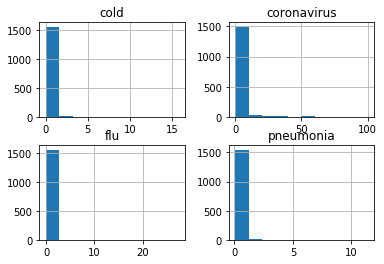

In [245]:

df2['date'] = pd.to_datetime(df2['date'])
print(df2.dtypes)
print(df2.head())
#dfs = pd.Series(df2)
#dfs = dfs.cumsum()
#df2.plot(); plt.legend(loc='best') 
df2.hist()
plt.show()

## Insights and Analysis

In [243]:
df2 = pd.read_csv('./SearchTrend.csv')
df2.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


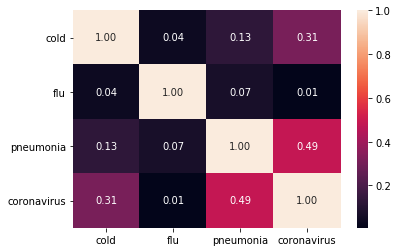

In [244]:
sns.heatmap(df2.corr(), annot=True, fmt='.2f')

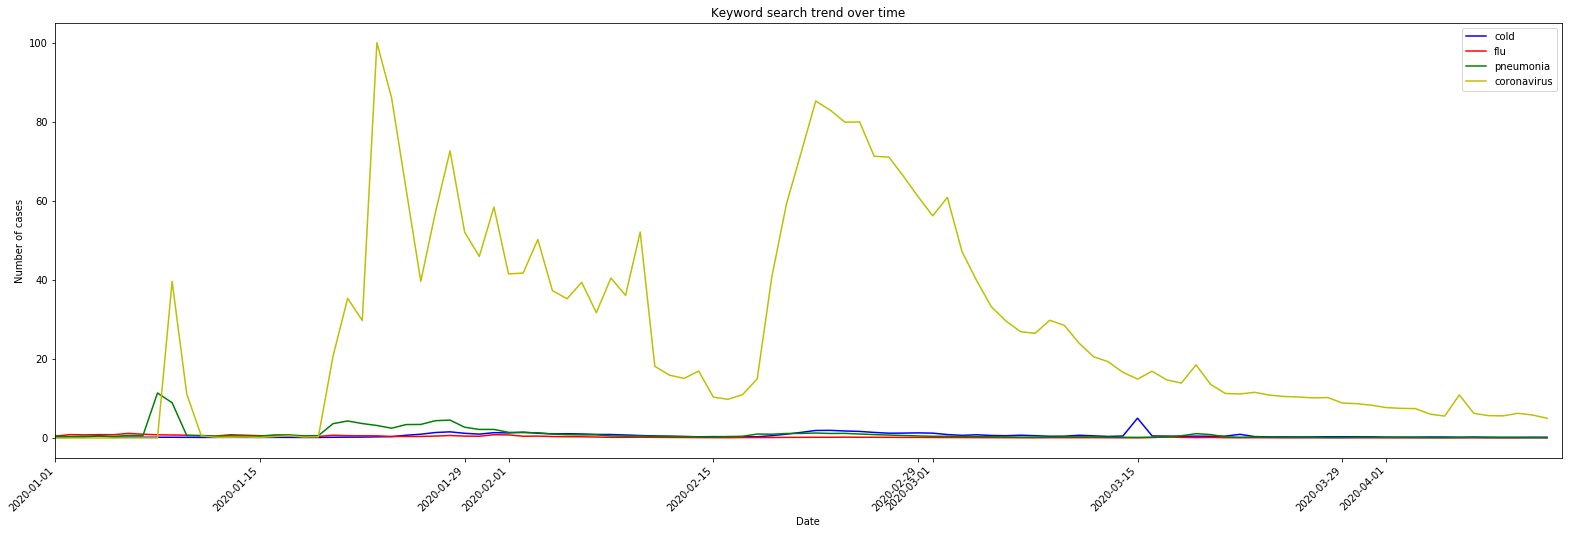

In [246]:
data_columns = ['date','cold','flu','pneumonia', 'coronavirus']
#df2.index = pd.to_datetime(df2.index)
#df2_mean = df2[data_columns].resample('W').mean()

plt.figure(figsize=(27, 8))
plt.plot(df2['date'], df2['cold'], 'b-', label = 'cold')
plt.plot(df2['date'], df2['flu'], 'r-', label = 'flu')
plt.plot(df2['date'], df2['pneumonia'], 'g-', label = 'pneumonia')
plt.plot(df2['date'], df2['coronavirus'], 'y-', label = 'coronavirus')
plt.xlabel('Date'); plt.ylabel('Number of cases'); plt.title('Keyword search trend over time')
plt.xlim('2020-01-01','2020-04-13')
plt.xticks(rotation=45, ha="right")
#plt.ylim(0,20)
plt.legend();

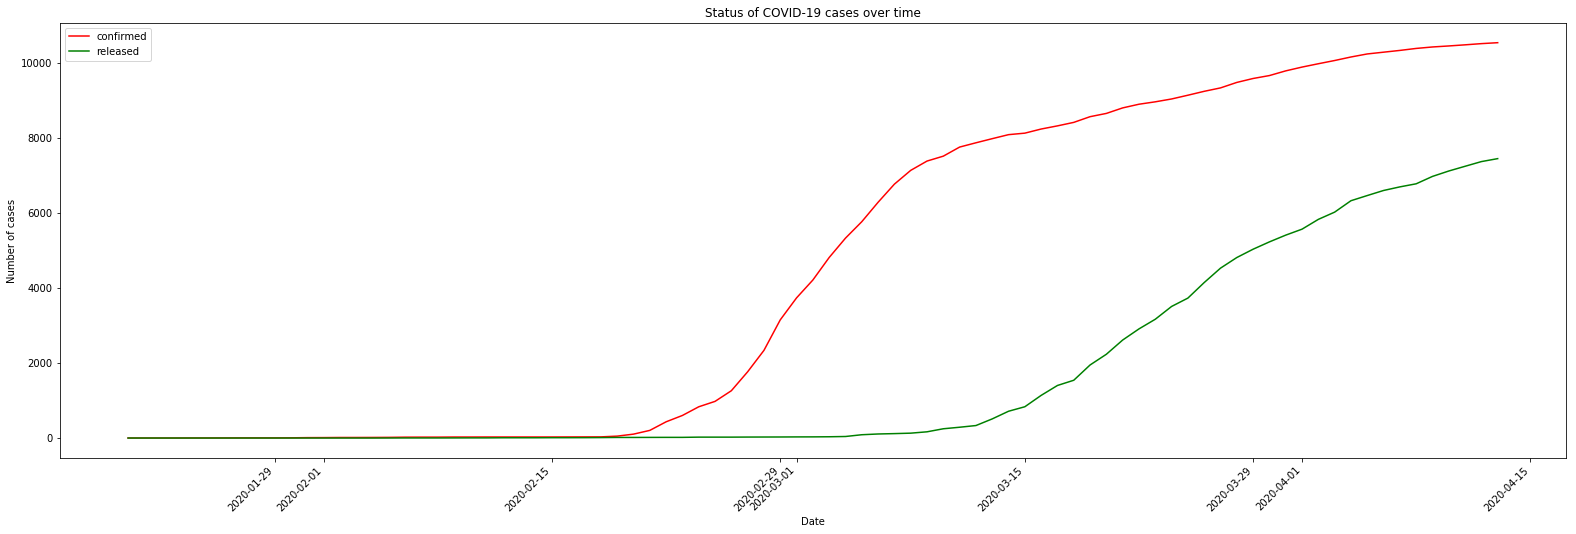

In [247]:
df = pd.read_csv('./Time.csv')
df.head()
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(27, 8))
#plt.plot(df['date'], df['test'], 'b-', label = 'test')
plt.plot(df['date'], df['confirmed'], 'r-', label = 'confirmed')
plt.plot(df['date'], df['released'], 'g-', label = 'released')
#plt.plot(df['date'], df['deceased'], 'y-', label = 'deceased')
plt.xlabel('Date'); plt.ylabel('Number of cases'); plt.title('Status of COVID-19 cases over time')
#plt.xlim('2020-01-01','2020-04-14')
plt.xticks(rotation=45, ha="right")
#plt.ylim(0,20)
plt.legend();


In [3]:
df3 = pd.read_csv('./Region.csv')

df3.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


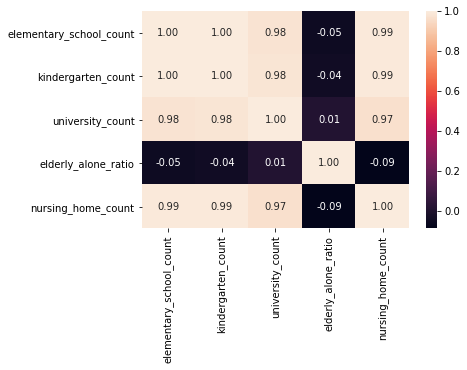

In [273]:
df3 = df3.drop(['code','latitude','longitude', 'academy_ratio','elderly_population_ratio'],axis=1)
#df4 = df3[df3.province == 'Seoul']

sns.heatmap(df3[df3.province == 'Seoul'].corr(), annot=True, fmt='.2f')


In [199]:
df = pd.read_csv('./TimeProvince.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


## Modeling
Given the time series data over the infections and recoveries over the last month, 
it would be interesting to predict the next time series data points. For this, we need to simply the date/time data to make them usable for linear regression modeling.

In [282]:
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression


In [396]:
df = pd.read_csv('./Time.csv')
df.head()
df['date'] = pd.to_datetime(df['date'])

In [397]:
#df['date'] = df['date'].map(datetime.datetime.toordinal)
X_columns = ['date','test','negative','confirmed','released']
Y_columns = ['deceased']
X = df[['date','test','negative','confirmed','released']]
y = df[Y_columns]

X['date'] = X['date'].map(datetime.datetime.toordinal)       
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)  
       
       
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_model.fit(X_train, y_train)
except:
    print("Oh no! It doesn't work!!!")

#print (lm_model.predict(X_test))  

y_test_preds = lm_model.predict(X_test)
r2_test = r2_score(y_test, y_test_preds)

# Print r2 to see result
r2_test

/usr/local/Cellar/ipython/7.4.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0.9986612153633098

The Rsquared value on test data prediction is 99%. It shows that the variance of its errors is 99% less than the variance of the dependent variable.

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


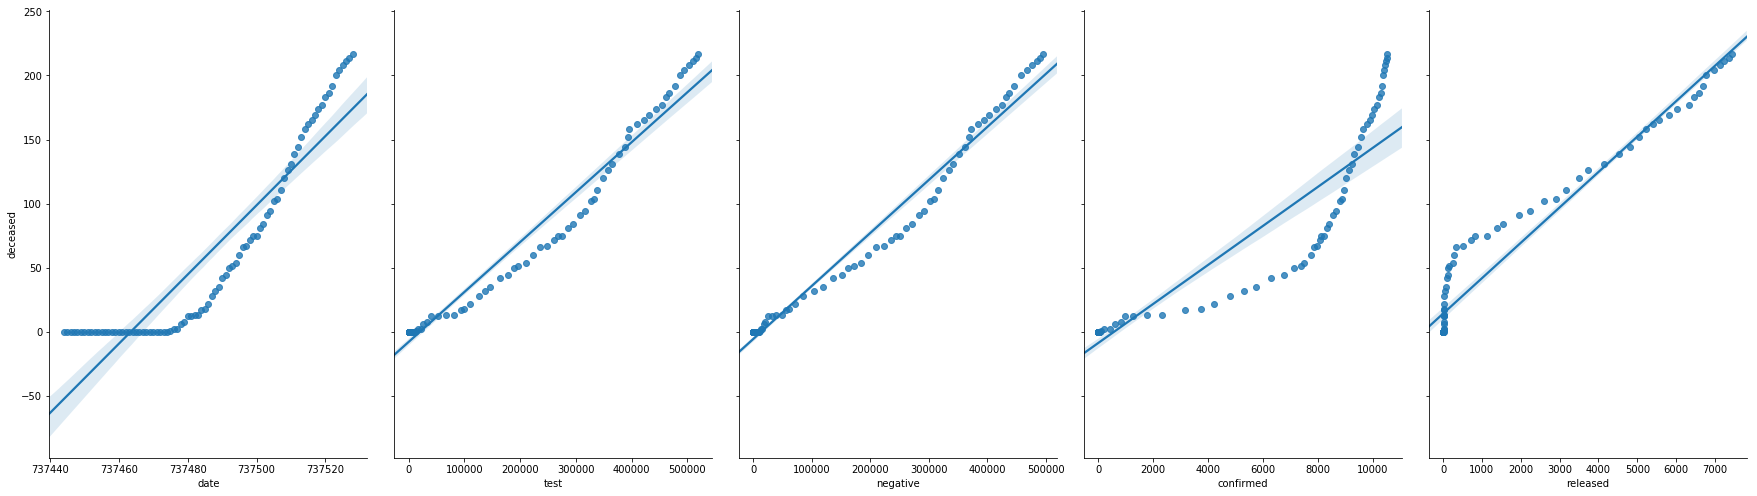

In [389]:

sns.pairplot(df, x_vars=['date','test','negative','confirmed','released'], y_vars=['deceased'], size=7, aspect=0.7, kind='reg')

In [383]:
print(np.sqrt(mean_squared_error(y_test, y_test_preds)))

2.593807703119808
